link to tablue : https://public.tableau.com/shared/CC62YRN5H?:display_count=n&:origin=viz_share_link

# Latar Belakang

TLC (Taxis and Limousines Commission) New York adalah badan pengatur transportasi yang berbasis di New York City, Amerika Serikat. Badan ini bertanggung jawab untuk mengawasi dan mengatur berbagai jenis layanan transportasi umum, termasuk taksi, mobil limosin, dan layanan ridesharing seperti Uber dan Lyft di wilayah New York. Tujuan utama TLC adalah untuk memastikan keselamatan, kenyamanan, dan keandalan bagi penumpang serta mengatur praktik bisnis para pengemudi dalam industri transportasi.

Salah satu komponen penting dari regulasi TLC adalah pengaturan jumlah taksi yang diizinkan beroperasi di kota. Hal ini mencakup pembatasan jumlah izin taksi kuning yang ada, yang membuat taksi kuning New York menjadi simbol ikonik bagi kota tersebut. TLC juga memiliki peraturan ketat terkait standar kendaraan, termasuk persyaratan inspeksi berkala untuk memastikan bahwa kendaraan yang digunakan dalam layanan transportasi umum tetap dalam kondisi baik dan aman bagi penumpang.

TLC juga mengatur kebijakan tarif untuk taksi kuning, yang mencakup tarif dasar, tarif per mil, dan tarif tunggu. Hal ini bertujuan untuk mencegah penumpang dikenakan biaya yang tidak wajar dan memberikan transparansi dalam biaya perjalanan. Selain itu, TLC juga memiliki peraturan terkait perilaku pengemudi, termasuk tuntutan untuk bersikap sopan dan menghormati hak-hak penumpang.

Seiring perkembangan teknologi, TLC juga terlibat dalam mengatur layanan ridesharing seperti Uber dan Lyft di kota. Mereka mengatur persyaratan pengemudi, tipe kendaraan yang diizinkan, dan aspek lainnya untuk memastikan layanan tersebut tetap sesuai dengan standar keselamatan dan kualitas.

Secara keseluruhan, TLC New York memiliki peran sentral dalam menjaga kualitas dan regulasi layanan transportasi umum di kota New York. Dengan mengawasi taksi, mobil limosin, dan layanan ridesharing, mereka berusaha untuk menciptakan lingkungan transportasi yang aman, efisien, dan terpercaya bagi warga kota dan pengunjung.

Industri transportasi adalah bagian integral dari kehidupan kota metropolitan seperti New York City. Menganalisis data TLC Trip Record dapat memberikan wawasan penting tentang tren perjalanan, preferensi pelanggan, efisiensi layanan, dan faktor lain yang dapat memengaruhi pengalaman pengguna dan kinerja penyedia layanan.

# Pernyataan Masalah
Dalam konteks dataset New York City TLC Trip Record yang melacak detail perjalanan taksi. Hal ini yang perlu perhatian untuk tujuan pada pemahaman mendalam tentang faktor-faktor yang memengaruhi pendapatan sopir taksi, seperti waktu perjalanan, jarak tempuh, waktu pemesanan, serta daerah tujuan. Selain itu, diperlukan analisis terkait preferensi pembayaran penumpang, apakah lebih cenderung menggunakan tunai atau pembayaran elektronik, dan apakah ada pola khusus yang dapat diidentifikasi. Dari segi pengalaman penumpang, perlu dieksplorasi bagaimana pelayanan taksi dapat ditingkatkan melalui pemahaman terhadap rute yang lebih efisien, waktu tunggu minimal, serta kenyamanan selama perjalanan. Pernyataan masalah ini mengajukan pertanyaan  mengenai bagaimana data karakteristik perjalanan taksi dapat memberikan wawasan berharga untuk meningkatkan pendapatan dan kenyamanan penumpang, sekaligus mendorong eksplorasi solusi inovatif yang berpotensi mengubah paradigma layanan taksi di New York City.Jadi pernyataan masalahnya adalah: 

Bagaimana kita dapat mengoptimalkan karakteristik perjalanan taksi untuk memaksimalkan pendapatan dan preferensi pembayaran, sambil menciptakan pengalaman yang lebih baik bagi penumpang?

<img src="https://www.nyc.gov/assets/tlc/images/content/pages/about/about-tlc.png">

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import matplotlib.ticker as ticker
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

| Nama Kolom            | Penjelasan                                                                                   |
|-----------------------|----------------------------------------------------------------------------------------------|
| VendorID              | Kode yang mengindikasikan penyedia layanan LPEP yang memberikan catatan.                    |
|                       | 1 = Creative Mobile Technologies, LLC.                                                      |
|                       | 2 = VeriFone Inc.                                                                          |
| lpep_pickup_datetime  | Tanggal dan waktu ketika pengukuran meter dimulai.                                         |
| lpep_dropoff_datetime | Tanggal dan waktu ketika pengukuran meter dihentikan.                                      |
| Passenger_count       | Jumlah penumpang dalam kendaraan. Ini adalah nilai yang dimasukkan oleh sopir.              |
| Trip_distance         | Jarak perjalanan yang sudah dilalui dalam mil, diukur oleh taksi meter.                     |
| PULocationID          | Kode Zona Taksi TLC tempat taksi mulai diukur.                                             |
| DOLocationID          | Kode Zona Taksi TLC tempat taksi berhenti diukur.                                          |
| RateCodeID            | Kode tarif akhir yang berlaku pada akhir perjalanan.                                       |
|                       | 1 = Standard rate                                                                          |
|                       | 2 = JFK                                                                                    |
|                       | 3 = Newark                                                                                 |
|                       | 4 = Nassau or Westchester                                                                   |
|                       | 5 = Negotiated fare (tarif negosiasi)                                                       |
|                       | 6 = Group ride (kelompok perjalanan)                                                        |
| Store_and_fwd_flag    | Flag yang menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum      |
|                       | dikirim ke vendor, disebut juga "store and forward," karena kendaraan tidak memiliki        |
|                       | koneksi ke server.                                                                          |
|                       | Y = perjalanan disimpan dan diteruskan                                                      |
|                       | N = bukan perjalanan disimpan dan diteruskan                                                 |
| Payment_type          | Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan.                       |
|                       | 1 = Kartu kredit                                                                           |
|                       | 2 = Tunai                                                                                   |
|                       | 3 = Tidak dikenakan biaya                                                                    |
|                       | 4 = perselisihan                                                                                 |
|                       | 5 = Tidak diketahui                                                                           |
|                       | 6 = Perjalanan dibatalkan                                                                     |
| Fare_amount           | Biaya perjalanan yang dihitung berdasarkan waktu dan jarak menggunakan taksi meter.          |
| MTA_tax               | Biaya taksi MTA sebesar $0,50 yang diaktifkan secara otomatis berdasarkan tarif yang         |
|                       | digunakan pada meter.                                                                       |
| Improvement_surcharge | Biaya perbaikan sebesar $0,30 yang dikenakan pada perjalanan yang diambil (menggunakan        |
|                       | tangan) pada awal perjalanan. Biaya ini mulai dikenakan sejak tahun 2015.                    |
| Tip_amount            | Bagian ini otomatis diisi untuk tip dengan kartu kredit. Tip tunai tidak termasuk di sini.  |
| Tolls_amount          | Jumlah total semua tol yang dibayarkan selama perjalanan.                                    |
| Total_amount          | Jumlah total yang dibebankan kepada penumpang. Tidak termasuk tips tunai.                     |
| Trip_type             | Kode yang menunjukkan apakah perjalanan adalah panggilan di jalan atau tugas yang diberikan  |
|                       | secara otomatis berdasarkan tarif yang digunakan pada meter, tetapi dapat diubah oleh sopir.  |
|                       | 1 = Panggilan di jalan                                                                       |
|                       | 2 = Dipesan lewat kantor atau dari telepon seluler                                             |


In [2]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
pd.set_option('display.max_colwidth', 0)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

### Missing Value

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

Dalam dataset yang Anda berikan, terdapat beberapa kolom dengan persentase data yang kosong. Berikut adalah daftar kolom tersebut beserta persentase data kosongnya:

* store_and_fwd_flag (6.34% kosong): Kolom ini mungkin berisi informasi apakah perjalanan disimpan dalam memori sebelum dikirimkan. Data kosong mungkin menunjukkan bahwa informasi ini tidak tersedia untuk beberapa perjalanan.

* RatecodeID (6.34% kosong): Kolom ini mungkin berisi kode tarif yang digunakan untuk menghitung biaya perjalanan. Data kosong bisa jadi menunjukkan bahwa kode tarif tidak tersedia untuk beberapa perjalanan.

* passenger_count (6.34% kosong): Kolom ini berisi jumlah penumpang dalam perjalanan. Data kosong bisa menunjukkan bahwa informasi jumlah penumpang tidak tersedia untuk beberapa perjalanan.

* payment_type (6.34% kosong): Kolom ini mungkin berisi jenis pembayaran yang digunakan untuk perjalanan. Data kosong bisa jadi menunjukkan bahwa informasi pembayaran tidak tersedia untuk beberapa perjalanan.

* trip_type (6.35% kosong): Kolom ini mungkin berisi jenis perjalanan (misalnya, satu arah atau pulang-pergi). Data kosong bisa menunjukkan bahwa informasi jenis perjalanan tidak tersedia untuk beberapa perjalanan.

* congestion_surcharge (6.34% kosong): Kolom ini mungkin berisi biaya tambahan akibat kemacetan lalu lintas. Data kosong bisa jadi menunjukkan bahwa biaya tambahan ini tidak berlaku untuk beberapa perjalanan.

* ehail_fee (100% kosong): Kolom ini sepenuhnya kosong, artinya tidak ada data yang tersedia. Mungkin kolom ini tidak digunakan dalam dataset ini atau ada masalah dengan pengumpulan data.

In [7]:
data = df

<Axes: >

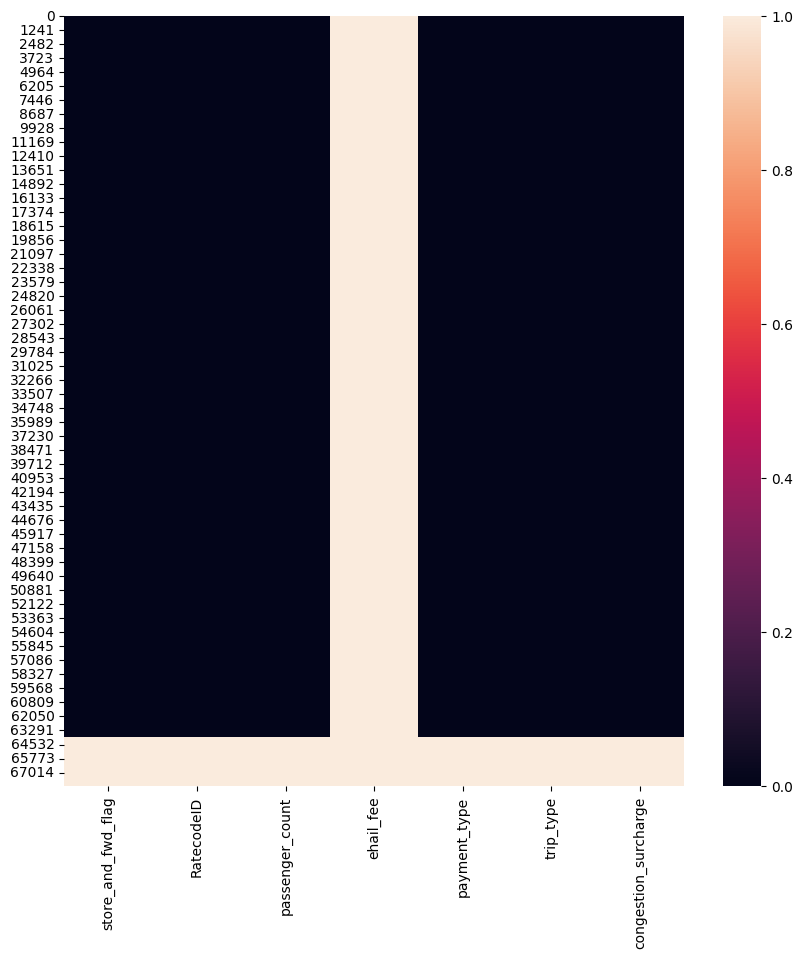

In [8]:

plt.figure(figsize=(10,10))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna())

# Pembersihan dan Pemeriksaan Data

**Handling missing values**

In [38]:
data.duplicated().sum()

0

* data tidak ada duplikat

In [9]:
data.drop(columns=['ehail_fee'], inplace=True)

Kolom ini sepenuhnya berisi nilai NaN (Not a Number), yang berarti tidak ada informasi yang bermanfaat yang bisa diekstrak darinya. Oleh karena itu, kolom ini dapat dihapus untuk mengurangi kompleksitas data.

In [10]:
data.dropna(subset=['store_and_fwd_flag', 'RatecodeID', 'trip_type', 'congestion_surcharge','payment_type'], inplace=True)

Kolom 'store_and_fwd_flag', 'RatecodeID', 'trip_type', dan 'congestion_surcharge','payment_type' memiliki beberapa nilai hilang. Data dengan nilai hilang dalam kolom-kolom ini dihapus karena mereka tidak memberikan informasi yang lengkap.

In [11]:
data[data['payment_type']==5]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2289,1,2023-01-02 17:07:45,2023-01-02 17:26:42,N,1.0,73,82,1.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,1.0,0.0
14210,1,2023-01-08 12:10:42,2023-01-08 12:10:45,N,1.0,39,39,1.0,0.0,3.0,0.0,1.5,0.0,0.0,1.0,4.5,5.0,1.0,0.0


In [12]:
df.drop([2289, 14210], inplace=True)

* data di hapus saja karena data tidak memiliki tipe pembayaran yang jelas

In [13]:
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])

Mengubah kolom tanggal 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' ke tipe datetime memungkinkan analisis yang lebih baik berdasarkan waktu.

<img src="https://www.nyc.gov/assets/tlc/downloads/Businesses/suv-ford-escape.png">

In [14]:
data['passenger_count'].fillna(1, inplace=True)
data['passenger_count'].replace(0, 1, inplace=True)
data['passenger_count'] = data['passenger_count'].apply(lambda x: min(x, 7))


 * kolom 'passenger_count' diisi dengan nilai 1 untuk setiap baris yang memiliki nilai kosong (NaN). mengganti nilai 0 dalam kolom 'passenger_count' dengan nilai 1. Ini mungkin dilakukan untuk menghindari nilai nol yang tidak masuk akal dalam konteks jumlah penumpang karena setidak nya ada 1 orang penupang dalam taxi TLC new york karena taxi ini untuk antar orang bukan antar barang. 

 * setiap nilai dalam kolom 'passenger_count' diterapkan yang membatasi nilai maksimum menjadi 7. Ini dapat dilakukan untuk memastikan bahwa jumlah penumpang yang dilaporkan tidak melebihi batas yang masuk akal, misalnya, jika kendaraan tersebut hanya dapat menampung maksimal 7 penumpang.

<img src="https://qph.cf2.quoracdn.net/main-qimg-2f1053ffe77692fb1a081242f7db3a1f-lq">

In [15]:
# Luas total wilayah kota New York dalam mil persegi
luas_wilayah_ny_mil = 305

data.drop(data[data['trip_distance'] >= luas_wilayah_ny_mil].index, inplace=True)

* Tindakan analisis yang dilakukan melibatkan DataFrame yang mungkin berisi data perjalanan di kota New York. Langkah pertama mengukur jarak perjalanan dalam kolom 'trip_distance'. Kemudian, ada asumsi bahwa nilai jarak perjalanan yang signifikan tidak mungkin melebihi ukuran geografis wilayah kota itu sendiri. Oleh karena itu, langkah selanjutnya adalah menghilangkan data yang memiliki nilai jarak perjalanan yang tidak masuk akal, yaitu lebih besar dari luas wilayah kota New York itu sendiri, yang diukur sekitar 468.9 mil persegi. Tindakan penghapusan ini bertujuan untuk membersihkan dataset dari entri yang mungkin salah atau tidak sesuai dengan batasan geografis yang masuk akal.  https://id.wikipedia.org/wiki/Kota_New_York

In [16]:

def remove_negative(value):
    return max(0, value)

columns_to_adjust = ['fare_amount', 'extra', 'mta_tax', 'tip_amount','improvement_surcharge','congestion_surcharge']

data[columns_to_adjust] = data[columns_to_adjust].applymap(remove_negative)

* Langkah analisis ini melibatkan DataFrame yang memuat data perjalanan taksi di New York. Tujuannya adalah membersihkan data dari entri yang tidak masuk akal atau tidak valid terkait biaya perjalanan. Dalam langkah konkret ini, data yang memiliki nilai biaya dasar perjalanan ('fare_amount'),(extra),(mta_tax),(tip_amount),(improvement_surcharge),(congestion_surcharge) yang kurang dari atau sama dengan nol dihapus dari DataFrame. Langkah ini penting untuk menjaga kualitas data dengan menghilangkan entri yang mungkin mencerminkan kesalahan atau ketidakakuratan dalam pengumpulan informasi biaya perjalanan.

In [17]:
data['total_amount'] = data['fare_amount'] + data['extra'] + data['mta_tax'] + data['tip_amount']

* Alasan di balik pembuatan kolom 'total_amount' ini adalah untuk menggabungkan berbagai komponen biaya dalam perjalanan menjadi satu nilai yang lebih representatif. Dalam konteks tarif transportasi, biaya perjalanan sering kali terdiri dari beberapa komponen, seperti tarif dasar (fare_amount), biaya tambahan (extra), pajak (mta_tax), dan tip yang diberikan (tip_amount). Dengan menghitung total dari komponen-komponen ini, Anda mendapatkan gambaran keseluruhan biaya yang harus dibayarkan oleh pelanggan.

In [18]:
print("Jumlah baris dan kolom di dataset setelah pembersihan:", data.shape)
data.info()

Jumlah baris dan kolom di dataset setelah pembersihan: (63874, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 63874 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63874 non-null  int64         
 1   lpep_pickup_datetime   63874 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63874 non-null  datetime64[ns]
 3   store_and_fwd_flag     63874 non-null  object        
 4   RatecodeID             63874 non-null  float64       
 5   PULocationID           63874 non-null  int64         
 6   DOLocationID           63874 non-null  int64         
 7   passenger_count        63874 non-null  float64       
 8   trip_distance          63874 non-null  float64       
 9   fare_amount            63874 non-null  float64       
 10  extra                  63874 non-null  float64       
 11  mta_tax                63874 non-null  float64       
 12

In [19]:
data.isna().sum()/data.shape[0]*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

## data sudah bersih dan akan di lakukan analisis

In [20]:
data['payment_type'].value_counts()

payment_type
1.0    40675
2.0    22632
3.0    472  
4.0    95   
Name: count, dtype: int64

# Analisis Deskriptif

In [21]:
data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63874.000000,63874,63874,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000
mean,1.855919,2023-01-16 20:29:58.098851072,2023-01-16 20:47:56.523139584,1.101779,97.731753,138.309703,1.321101,2.552484,16.090957,0.882855,0.628249,2.041793,0.144087,0.951836,19.643854,1.373564,1.021934,0.726982
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:15:57.500000,2023-01-09 12:34:14.500000,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,11.580000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46.500000,2023-01-17 08:59:24.500000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,16.100000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:43.249999872,2023-01-24 16:36:50.249999872,1.000000,118.500000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,23.430000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,7.000000,66.180000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,490.000000,4.000000,2.000000,2.750000
std,0.351174,NaN,NaN,0.620310,60.174354,76.883146,0.974108,2.672388,13.242704,1.289307,0.363792,2.998320,1.012446,0.181883,14.477713,0.507662,0.146469,1.212668


Untuk mencapai jawaban dari "Bagaimana karakteristik perjalanan taksi di New York City berdampak pada pendapatan dan preferensi pembayaran, serta bagaimana efektivitas layanan dapat ditingkatkan untuk memberikan pengalaman lebih baik kepada penumpang?" diperlukan analisis deskriptif lebih spesifik terhadap variabel yang berkaitan langsung dengan biaya. Yaitu sebagai berikut:

In [22]:
trip_desc = data[['trip_distance', 'fare_amount', 'tip_amount']].describe()
trip_desc

,trip_distance,fare_amount,tip_amount
count,63874.000000,63874.000000,63874.000000
mean,2.552484,16.090957,2.041793
std,2.672388,13.242704,2.998320
min,0.000000,0.000000,0.000000
25%,1.100000,9.000000,0.000000
50%,1.800000,12.800000,1.400000
75%,3.050000,19.100000,3.220000
max,66.180000,490.000000,222.220000


Dari statistik deskriptif, dapat diamati bahwa:

* trip_distance (jarak perjalanan): Rata-rata jarak perjalanan adalah sekitar 2.55 mil, dengan variasi yang signifikan sekitar 2.66 mil. Rentang jarak perjalanan bervariasi dari 0 hingga sekitar 66.18 mil. Nilai rata-rata dan variasi yang signifikan menunjukkan variasi yang cukup besar dalam jarak perjalanan yang dilakukan oleh penumpang, sementara adanya nilai nol dan ekstrem atas menunjukkan kemungkinan adanya data yang tidak valid atau aneh.

* fare_amount (biaya perjalanan): Rata-rata biaya perjalanan adalah sekitar 16.09 USD, dengan variasi yang cukup besar sekitar 13.23 USD. Rentang biaya perjalanan beragam dari 0.0 hingga sekitar 490 USD. Adanya nilai minimum yang sangat rendah dan nilai maksimum yang sangat tinggi mungkin mengindikasikan keberadaan data yang ekstrem atau tidak valid dalam distribusi biaya perjalanan.

* tip_amount (jumlah tip): Rata-rata jumlah tip adalah sekitar 2.04 USD, dengan variasi yang signifikan sekitar 2.99 USD. Rentang jumlah tip bervariasi dari 0 hingga sekitar 222.22 USD. Adanya nilai nol dalam jumlah tip mengindikasikan bahwa beberapa perjalanan mungkin tidak mendapatkan tip, sedangkan nilai maksimum yang tinggi mungkin menunjukkan adanya perjalanan dengan tip yang tidak biasa besar.

In [23]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,20.43,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,14.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,10.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


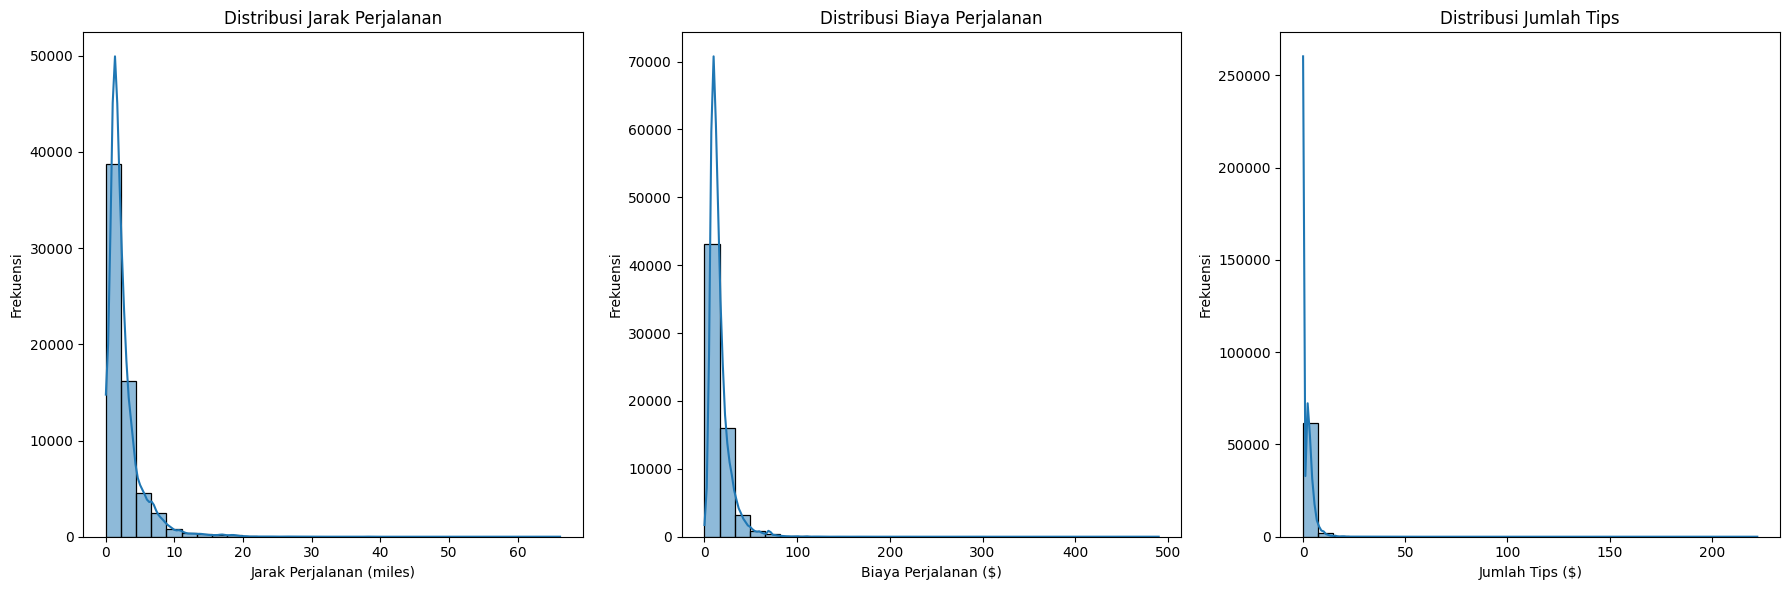

In [24]:
plt.figure(figsize=(18, 6))  

plt.subplot(1, 3, 1) 
sns.histplot(data['trip_distance'], bins=30, kde=True)
plt.title("Distribusi Jarak Perjalanan")
plt.xlabel("Jarak Perjalanan (miles)")
plt.ylabel("Frekuensi")
plt.subplot(1, 3, 2) 
sns.histplot(data['fare_amount'], bins=30, kde=True)
plt.title("Distribusi Biaya Perjalanan")
plt.xlabel("Biaya Perjalanan ($)")
plt.ylabel("Frekuensi")

plt.subplot(1, 3, 3)  
sns.histplot(data['tip_amount'], bins=30, kde=True)
plt.title("Distribusi Jumlah Tips")
plt.xlabel("Jumlah Tips ($)")
plt.ylabel("Frekuensi")

plt.tight_layout()  
plt.show()


* Grafik Distribusi Jarak Perjalanan:
Grafik pertama (kiri) menampilkan distribusi jarak perjalanan dalam mil. Sumbu x mewakili rentang jarak perjalanan, sedangkan sumbu y menunjukkan berapa kali jarak perjalanan berada dalam rentang tersebut. Puncak frekuensi terletak pada jarak perjalanan yang lebih pendek, menunjukkan bahwa sebagian besar perjalanan memiliki jarak yang tidak terlalu jauh. Seiring jarak perjalanan meningkat, frekuensi jumlah perjalanan cenderung menurun.

* Grafik Distribusi Biaya Perjalanan:
Grafik kedua (tengah) menggambarkan distribusi biaya perjalanan dalam dolar. Sumbu x mewakili rentang biaya perjalanan, sementara sumbu y menunjukkan seberapa sering biaya perjalanan jatuh dalam rentang tersebut. Pusat distribusi berada di sekitar biaya yang lebih rendah, menunjukkan bahwa sebagian besar perjalanan memiliki biaya yang terjangkau. Meskipun demikian, ada beberapa perjalanan dengan biaya lebih tinggi yang juga terlihat dalam distribusi.

* Grafik Distribusi Jumlah Tips:
Grafik ketiga (kanan) menggambarkan distribusi jumlah tips dalam dolar. Sumbu x menunjukkan rentang jumlah tips, sedangkan sumbu y menggambarkan frekuensi jumlah perjalanan dengan jumlah tips dalam rentang tersebut. Banyak perjalanan tampaknya tidak menerima tips atau hanya menerima tips dalam jumlah kecil. Namun, ada beberapa perjalanan yang menerima tips lebih besar. Distribusi ini memberikan gambaran tentang seberapa umum tips besar dan kecil dalam perjalanan taksi ini.

Secara keseluruhan, visualisasi ini membantu Anda memahami bagaimana data terdistribusi untuk variabel penting dalam perjalanan taksi, yaitu jarak perjalanan, biaya perjalanan, dan jumlah tips

# Analisis Korelasi

In [25]:
data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63874.000000,63874,63874,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000
mean,1.855919,2023-01-16 20:29:58.098851072,2023-01-16 20:47:56.523139584,1.101779,97.731753,138.309703,1.321101,2.552484,16.090957,0.882855,0.628249,2.041793,0.144087,0.951836,19.643854,1.373564,1.021934,0.726982
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:15:57.500000,2023-01-09 12:34:14.500000,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,11.580000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46.500000,2023-01-17 08:59:24.500000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,16.100000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:43.249999872,2023-01-24 16:36:50.249999872,1.000000,118.500000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,23.430000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,7.000000,66.180000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,490.000000,4.000000,2.000000,2.750000
std,0.351174,NaN,NaN,0.620310,60.174354,76.883146,0.974108,2.672388,13.242704,1.289307,0.363792,2.998320,1.012446,0.181883,14.477713,0.507662,0.146469,1.212668


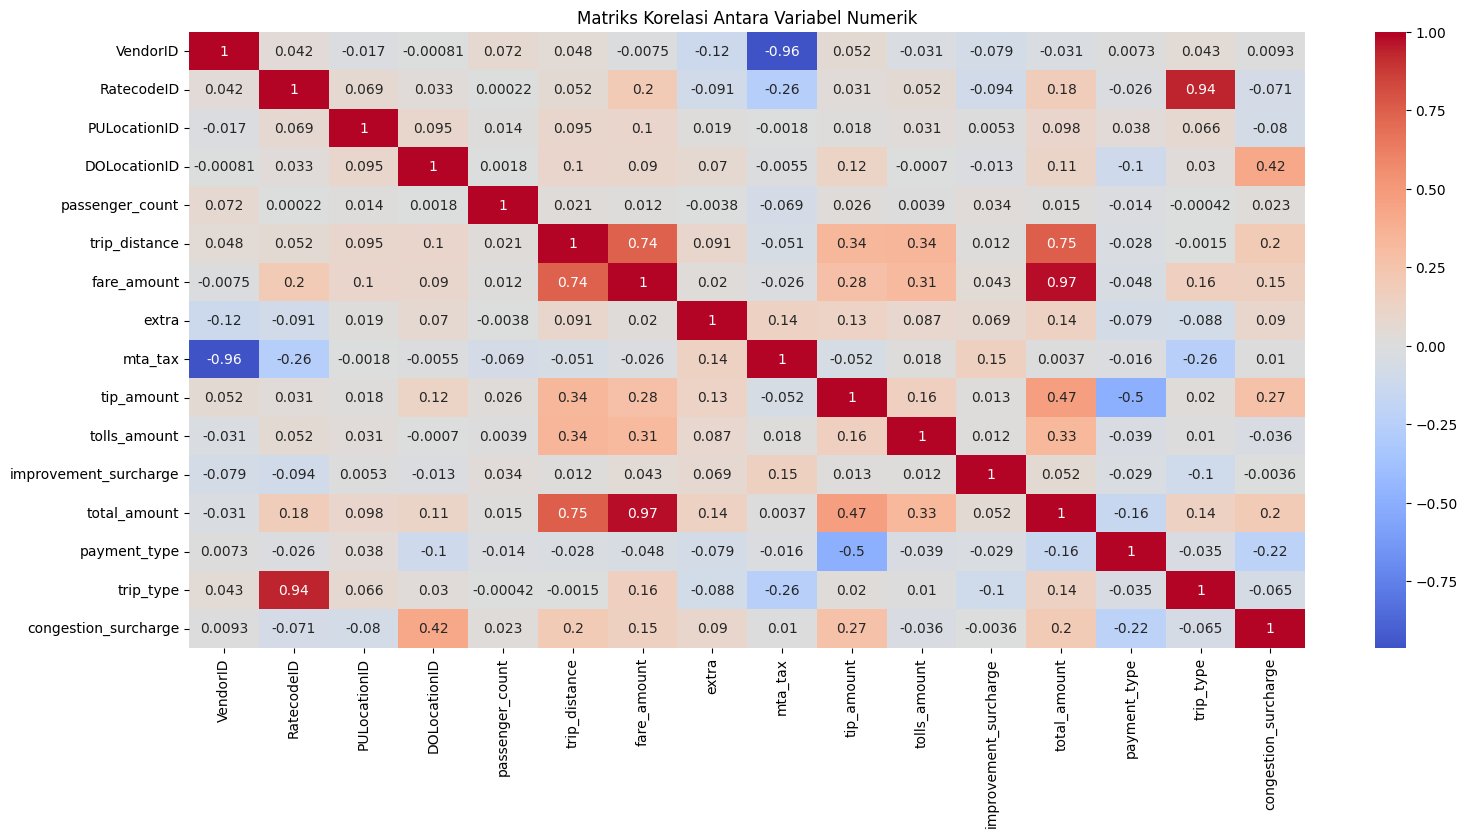

In [26]:
numerical_columns = data.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriks Korelasi Antara Variabel Numerik")
plt.show()

visualisasi korelasi di atas mencerminkan hubungan antara setiap pasangan variabel numerik dalam dataset perjalanan taksi. Nilai dalam tabel ini berada dalam rentang -1 hingga 1, dengan nilai 1 menunjukkan hubungan positif sempurna, -1 menunjukkan hubungan negatif sempurna, dan 0 menunjukkan tidak adanya hubungan linier.

- **VendorID dan mta_tax:**
  Terdapat korelasi negatif sangat kuat antara "VendorID" dan "mta_tax" (nilai -0.968319). Ini mengindikasikan bahwa ada hubungan kuat antara vendor (penyedia layanan taksi) dan mta_tax (biaya pajak tambahan pada tarif), sehingga perubahan dalam VendorID dapat berkorelasi dengan perubahan dalam mta_tax.

- **RatecodeID dan trip_type:**
  Ada korelasi positif kuat antara "RatecodeID" dan "trip_type" (nilai 0.936274). Ini menunjukkan bahwa ada hubungan yang kuat antara kode tarif yang digunakan dan tipe perjalanan yang dilakukan. Kemungkinan besar, jenis tarif yang digunakan dapat mempengaruhi tipe perjalanan yang dipilih.

- **trip_distance dan fare_amount:**
  Terdapat korelasi positif yang kuat antara "trip_distance" dan "fare_amount" (nilai 0.743730). Ini menandakan bahwa jarak perjalanan memiliki pengaruh yang kuat terhadap biaya perjalanan. Semakin jauh jarak perjalanan, cenderung biaya perjalanan juga akan meningkat.

- **fare_amount dan total_amount:**
  Ada korelasi positif yang kuat antara "fare_amount" dan "total_amount" (nilai 0.966545). Ini menunjukkan bahwa biaya perjalanan memberikan kontribusi besar terhadap total biaya yang dibebankan kepada penumpang.

- **payment_type dan tip_amount:**
  Terdapat korelasi negatif yang kuat antara "payment_type" dan "tip_amount" (nilai -0.504817). Hal ini mengindikasikan bahwa metode pembayaran yang berbeda (cash, credit card, dll.) memiliki korelasi dengan jumlah tips yang diberikan oleh penumpang.

- **RatecodeID dan congestion_surcharge:**
  Terdapat korelasi positif yang moderat antara "RatecodeID" dan "congestion_surcharge" (nilai 0.421027). Ini bisa menunjukkan bahwa tipe tarif yang digunakan dapat berkaitan dengan penerapan biaya tambahan terkait kemacetan.

Melalui analisis matriks korelasi, kita dapat mengidentifikasi hubungan-hubungan ini antara variabel-variabel dalam dataset perjalanan taksi, yang dapat membantu kita memahami bagaimana variabel-variabel ini saling berinteraksi dan mempengaruhi hasil perjalanan taksi.

Untuk memastikan terjawabnya "Bagaimana karakteristik perjalanan taksi di New York City berdampak pada pendapatan dan preferensi pembayaran, serta bagaimana efektivitas layanan dapat ditingkatkan untuk memberikan pengalaman lebih baik kepada penumpang?" juga diperlukannya perhitungan korelasi dengan 3 variabel sebagai berikut.

In [27]:
correlation_trip_fare = data['trip_distance'].corr(data['fare_amount'])
correlation_trip_tip = data['trip_distance'].corr(data['tip_amount'])
correlation_fare_tip = data['fare_amount'].corr(data['tip_amount'])

print("Correlation between Trip Distance and Fare Amount:", correlation_trip_fare)
print("Correlation between Trip Distance and Tip Amount:", correlation_trip_tip)
print("Correlation between Fare Amount and Tip Amount:", correlation_fare_tip)


Correlation between Trip Distance and Fare Amount: 0.7410854089736592
Correlation between Trip Distance and Tip Amount: 0.3356967936598978
Correlation between Fare Amount and Tip Amount: 0.2771613612508355


- Korelasi antara jarak perjalanan (trip_distance) dan tarif perjalanan (fare_amount) adalah sekitar 0.74, menunjukkan hubungan yang cukup kuat. Hal ini bisa dijelaskan dengan fakta bahwa jarak yang lebih jauh cenderung memiliki tarif yang lebih tinggi.
- Korelasi antara jarak perjalanan (trip_distance) dan jumlah tip (tip_amount) adalah sekitar 0.33, menunjukkan hubungan yang lemah. Ini mungkin menunjukkan bahwa jarak perjalanan tidak memiliki pengaruh besar pada jumlah tip yang diberikan.
- Korelasi antara tarif perjalanan (fare_amount) dan jumlah tip (tip_amount) adalah sekitar 0.27, juga menunjukkan hubungan yang lemah. Ini menunjukkan bahwa meskipun ada korelasi antara tarif dan jumlah tip, faktor lain juga mempengaruhi jumlah tip yang diberikan.

# Analisis Zona

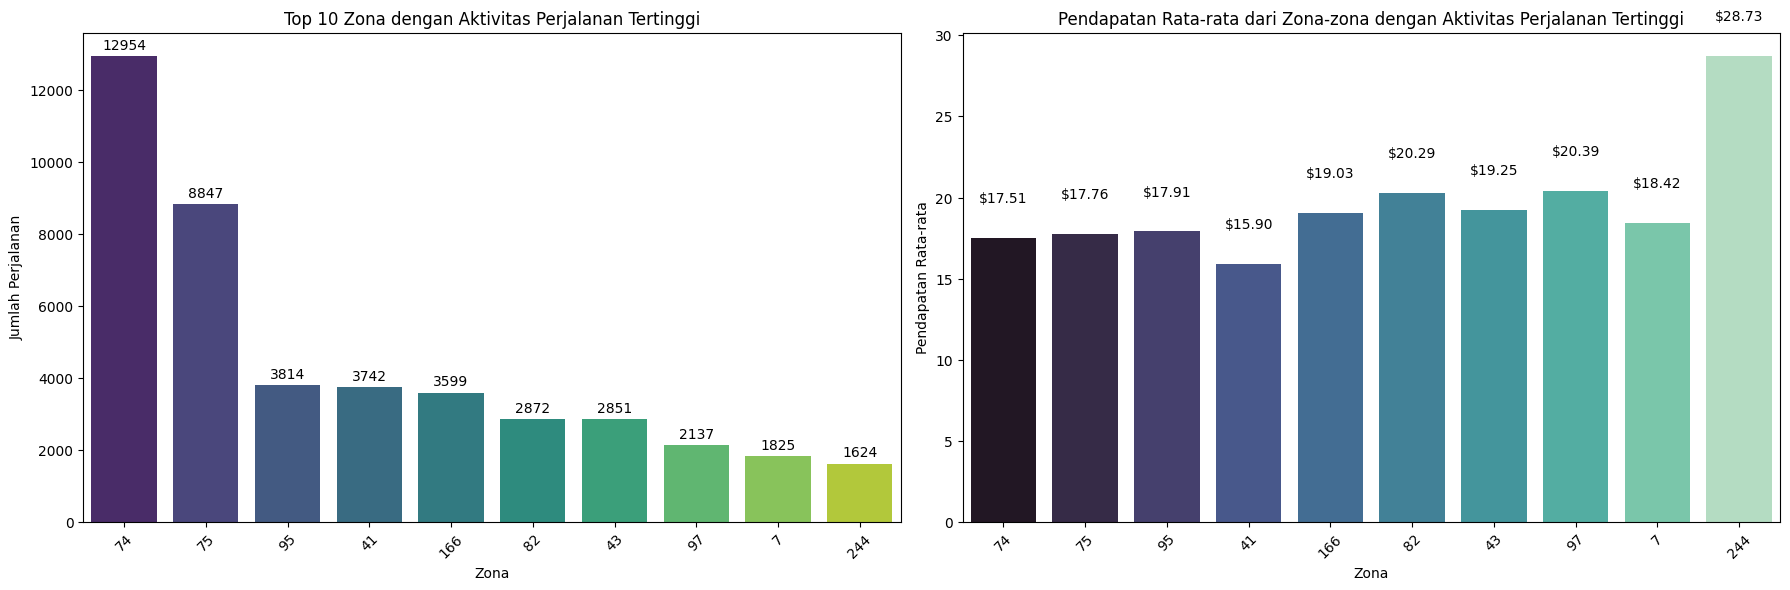

In [28]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

top_zones = data['PULocationID'].value_counts().head(10)
top_zones_sorted = top_zones.sort_values(ascending=False)
ax1 = sns.barplot(x=top_zones_sorted.index, y=top_zones_sorted.values, palette='viridis', order=top_zones_sorted.index)

for index, value in enumerate(top_zones_sorted.values):
    ax1.text(index, value + 100, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Zona dengan Aktivitas Perjalanan Tertinggi")
plt.xlabel("Zona")
plt.ylabel("Jumlah Perjalanan")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)

top_zones_mean_income = data.groupby('PULocationID')['total_amount'].mean().loc[top_zones.index]
ax2 = sns.barplot(x=top_zones.index, y=top_zones_mean_income.values, palette='mako', order=top_zones.index)

for index, value in enumerate(top_zones_mean_income.values):
    ax2.text(index, value + 2, f"${value:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Pendapatan Rata-rata dari Zona-zona dengan Aktivitas Perjalanan Tertinggi")
plt.xlabel("Zona")
plt.ylabel("Pendapatan Rata-rata")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Subplot Pertama: Aktivitas Perjalanan Tertinggi**
Grafik pertama menampilkan zona-zona dengan aktivitas perjalanan tertinggi, diukur berdasarkan jumlah perjalanan yang dimulai dari setiap zona. Dari grafik ini, kita dapat melihat 10 zona dengan jumlah perjalanan tertinggi. Zona 74 menonjol sebagai zona dengan aktivitas perjalanan tertinggi, diikuti oleh zona-zona lainnya seperti zona 75, 82, dan seterusnya.

**Subplot Kedua: Pendapatan Rata-rata dari Zona dengan Aktivitas Perjalanan Tertinggi**
Grafik kedua menampilkan pendapatan rata-rata dari zona-zona yang sama dengan subplot pertama. Pendapatan rata-rata dihitung dari total_amount dalam setiap perjalanan yang dimulai dari zona tersebut. Zona 74 juga menunjukkan pendapatan rata-rata yang cukup baik, demikian pula dengan zona 138. Namun, ada variasi dalam pendapatan rata-rata di antara zona-zona dengan aktivitas perjalanan tinggi.

Dari analisis ini, kita dapat melihat bahwa meskipun zona-zona tertentu memiliki aktivitas perjalanan yang tinggi, pendapatan rata-rata tidak selalu sebanding. Faktor-faktor lain seperti jarak perjalanan, tarif, dan pola perjalanan penumpang juga dapat mempengaruhi pendapatan. Oleh karena itu, perlu pendekatan yang lebih komprehensif dalam memahami hubungan antara aktivitas perjalanan dan pendapatan rata-rata di setiap zona.

# Analisis Pembayaran

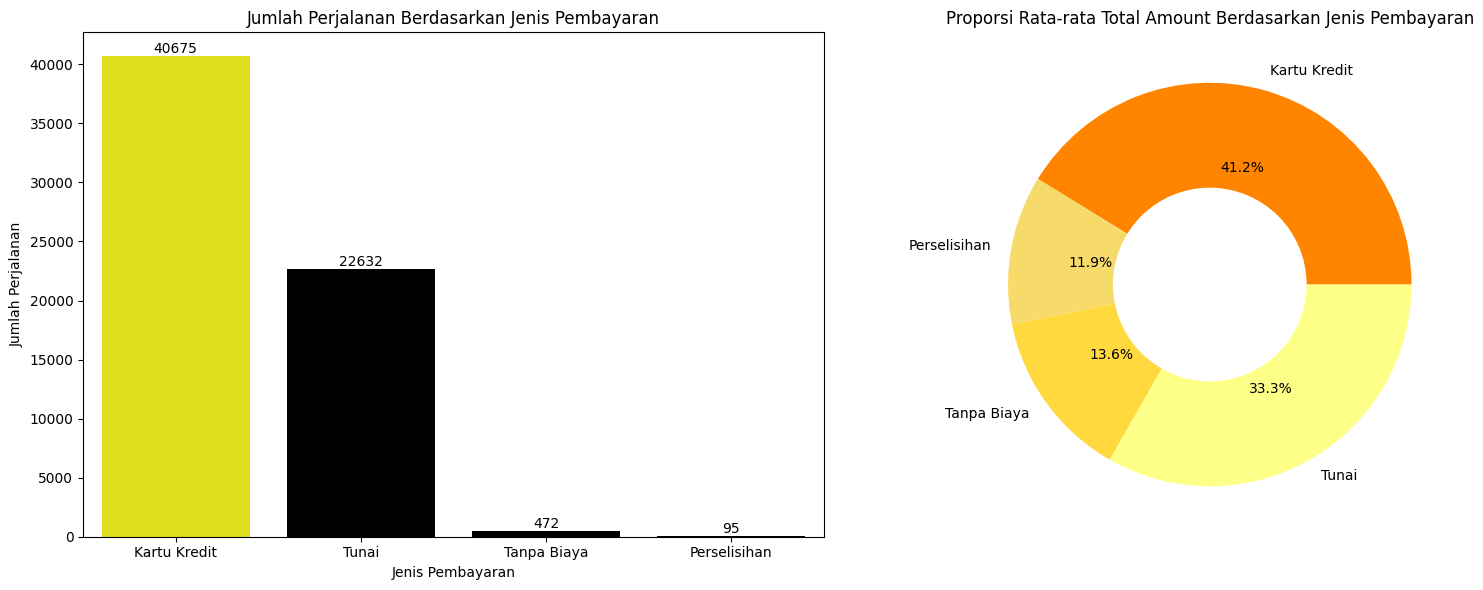

In [29]:
data['payment_type'] = data['payment_type'].replace({
    1: 'Kartu Kredit',
    2: 'Tunai',
    3: 'Tanpa Biaya',
    4: 'Perselisihan',
    5: 'Tidak Diketahui',
    6: 'Perjalanan Dibatalkan'
})


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)  
payment_counts = data['payment_type'].value_counts()
colors_bar = ['yellow' if p == payment_counts.max() else '#000000' for p in payment_counts]
bar_plot = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=colors_bar)
plt.title("Jumlah Perjalanan Berdasarkan Jenis Pembayaran")
plt.xlabel("Jenis Pembayaran")
plt.ylabel("Jumlah Perjalanan")
for index, value in enumerate(payment_counts.values):
    bar_plot.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)  
payment_mean_amount = data.groupby('payment_type')['total_amount'].mean()
colors_pie = ['#FF8400', '#F7DB6A', '#FFD93D', '#FEFF86', '#F6F1E9']
plt.pie(payment_mean_amount, labels=payment_mean_amount.index, autopct='%1.1f%%', colors=colors_pie)
plt.title("Proporsi Rata-rata Total Amount Berdasarkan Jenis Pembayaran")
plt.gca().add_artist(plt.Circle((0, 0), 0.48, fc='white'))
plt.tight_layout()
plt.show()


Plot Pertama: Jumlah Perjalanan Berdasarkan Jenis Pembayaran
Grafik ini menggambarkan bahwa sebagian besar perjalanan menggunakan kartu kredit dan tunai, dengan kartu kredit menjadi pilihan dominan. Jenis pembayaran lainnya memiliki frekuensi yang lebih rendah.

Plot Kedua: Proporsi Rata-rata Total Amount Berdasarkan Jenis Pembayaran
Grafik ini mengindikasikan bahwa perjalanan dengan pembayaran kartu kredit cenderung memiliki biaya total yang lebih tinggi daripada pembayaran tunai. Meskipun jumlah perjalanan dengan kartu kredit hampir sebanding dengan tunai, penggunaan kartu kredit memberikan proporsi rata-rata total amount yang lebih tinggi.

Angka-angka Penting:

* Jumlah perjalanan dengan Kartu Kredit: 4.0627
* Jumlah perjalanan dengan Tunai: 2.2601
* Rata-rata Total Amount Kartu Kredit: 30.1 %
* Rata-rata Total Amount Tunai: 24 %

Preferensi pembayaran kartu kredit dalam perjalanan taksi menghasilkan rata-rata biaya yang lebih tinggi daripada pembayaran tunai.
Meskipun pembayaran kartu kredit memiliki biaya lebih tinggi, kemungkinan adanya transaksi non-tunai dan pemberian tips yang lebih besar mungkin menjadi faktor penentu.
Penggunaan pembayaran tunai, meskipun lebih sering, cenderung menghasilkan biaya total yang lebih rendah, mungkin karena kurangnya pemberian tips yang signifikan atau adanya perjalanan yang lebih pendek.
Analisis ini memberikan gambaran yang lebih jelas tentang preferensi dan dampak finansial dari jenis pembayaran dalam industri perjalanan taksi. 

# Analisis Waktu

In [30]:
data['pickup_day'] = data['lpep_pickup_datetime'].dt.dayofweek
data['pickup_hour'] = data['lpep_pickup_datetime'].dt.hour

* penambahan sebuah kolom baru dengan nama 'pickup_day' ke dalam DataFrame 'data'. Kolom ini akan berisi angka yang merepresentasikan hari dalam bentuk angka 0 hingga 6, di mana 0 mewakili Senin, 1 mewakili Selasa, dan seterusnya hingga 6 yang merepresentasikan Minggu.

* kolom baru yang dinamakan 'pickup_hour'. Hasil dari langkah ini adalah kolom 'pickup_hour' yang berisi angka yang mewakili jam dalam format 0 hingga 23.

Dengan mengambil informasi hari dan jam dari waktu penjemputan dalam kolom 'lpep_pickup_datetime', analisis ini memungkinkan kita untuk melakukan analisis lebih lanjut terkait pola pemesanan berdasarkan hari dalam seminggu dan jam dalam sehari. Misalnya, kita dapat menentukan kapan aktivitas pemesanan paling padat, apakah ada perbedaan dalam pola pemesanan antara hari kerja dan akhir pekan, dan sejenisnya.

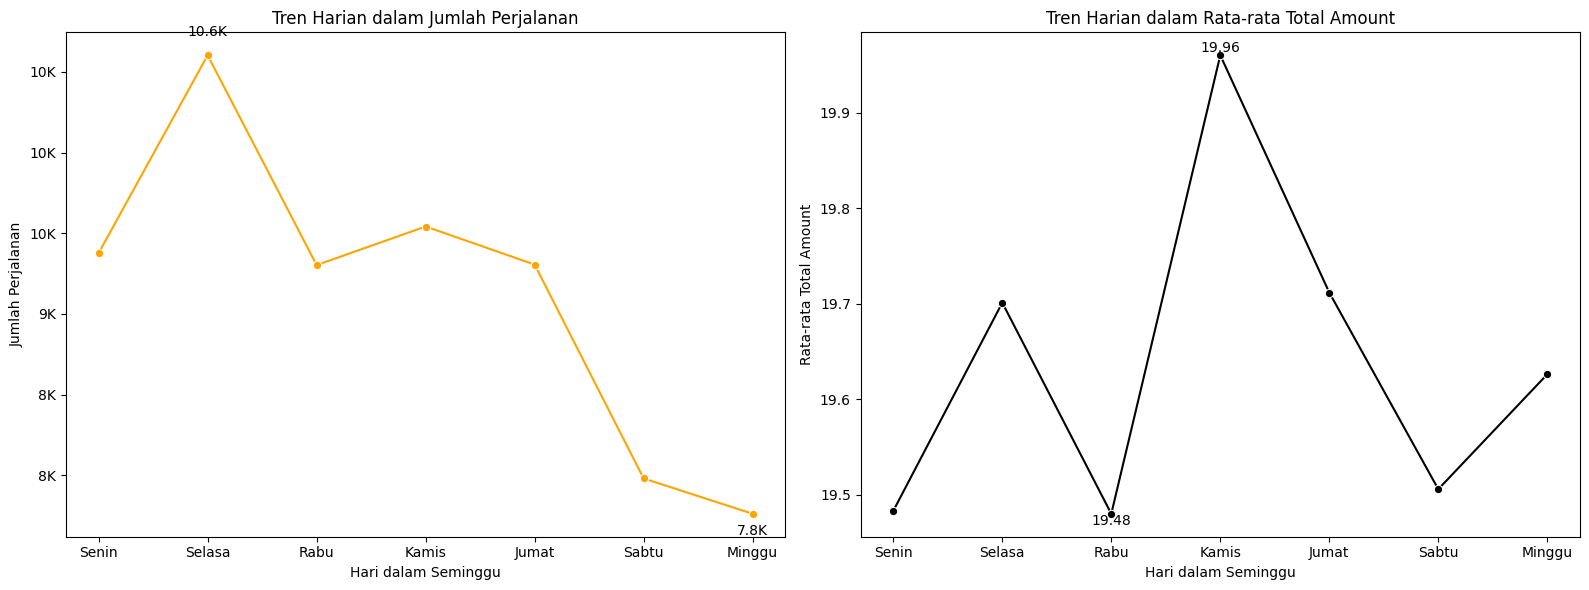

In [31]:
daily_trip_counts = data.groupby('pickup_day')['VendorID'].count()
plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 1)  
line_plot1 = sns.lineplot(x=daily_trip_counts.index, y=daily_trip_counts.values, marker='o', color='orange')
plt.title("Tren Harian dalam Jumlah Perjalanan")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Perjalanan")
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

max_index = daily_trip_counts.idxmax()
min_index = daily_trip_counts.idxmin()
plt.text(max_index, daily_trip_counts[max_index] + 100, f'{daily_trip_counts[max_index]/1000:.1f}K', ha='center', va='bottom', fontsize=10)
plt.text(min_index, daily_trip_counts[min_index] - 150, f'{daily_trip_counts[min_index]/1000:.1f}K', ha='center', va='bottom', fontsize=10)
line_plot1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

daily_income = data.groupby('pickup_day')['total_amount'].mean()
plt.subplot(1, 2, 2)  
line_plot2 = sns.lineplot(x=daily_income.index, y=daily_income.values, marker='o', color='black')  
plt.title("Tren Harian dalam Rata-rata Total Amount")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Total Amount")
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

max_value = daily_income.max()
min_value = daily_income.min()
max_index = daily_income.idxmax()
min_index = daily_income.idxmin()
plt.text(max_index, max_value, f'{max_value:.2f}', ha='center', va='bottom', fontsize=10)
plt.text(min_index, min_value, f'{min_value:.2f}', ha='center', va='top', fontsize=10)

plt.tight_layout()  
plt.show()


Plot Pertama: Tren Harian dalam Jumlah Perjalanan
Grafik tersebut memvisualisasikan tren harian jumlah perjalanan taksi selama seminggu. Dapat diamati bahwa permintaan perjalanan cenderung lebih tinggi pada hari kerja (Senin hingga Jumat) dan menurun pada akhir pekan (Sabtu dan Minggu). Pada puncaknya, jumlah perjalanan mencapai sekitar 10,6 ribu perjalanan pada selasa. Sebaliknya, jumlah perjalanan paling rendah terjadi pada minggu dengan sekitar 7,8 ribu perjalanan. Pola ini mengindikasikan bahwa orang lebih banyak menggunakan taksi untuk keperluan kerja atau komuter pada hari-hari biasa dibandingkan dengan akhir pekan.

Plot Kedua: Tren Harian dalam Rata-rata Total Amount
Grafik kedua menggambarkan tren harian rata-rata total amount (biaya total perjalanan) dalam seminggu. Dari plot ini terlihat bahwa rata-rata total amount perjalanan taksi cenderung lebih rendah pada akhir pekan (Sabtu dan Minggu) dibandingkan dengan hari kerja (Senin hingga Jumat). Titik puncak rata-rata total amount terjadi pada hari kamis,dan titik terendah pada hari sabtu menunjukkan bahwa biaya perjalanan taksi cenderung lebih rendah saat akhir pekan.

Analisis:

Terdapat kebalikan hubungan antara jumlah perjalanan dan rata-rata total amount dengan hari dalam seminggu.
Permintaan perjalanan taksi lebih tinggi pada hari kerja (Senin hingga Jumat), kemungkinan karena aktivitas bisnis dan komuter.
Biaya perjalanan taksi cenderung lebih rendah pada akhir pekan (Sabtu dan Minggu), yang mungkin disebabkan oleh kurangnya kegiatan bisnis dan lebih banyak rekreasi.
Dengan mempertimbangkan tren ini, layanan taksi dapat mengatur strategi tarif yang berbeda untuk merespons fluktuasi permintaan dan biaya perjalanan selama seminggu.

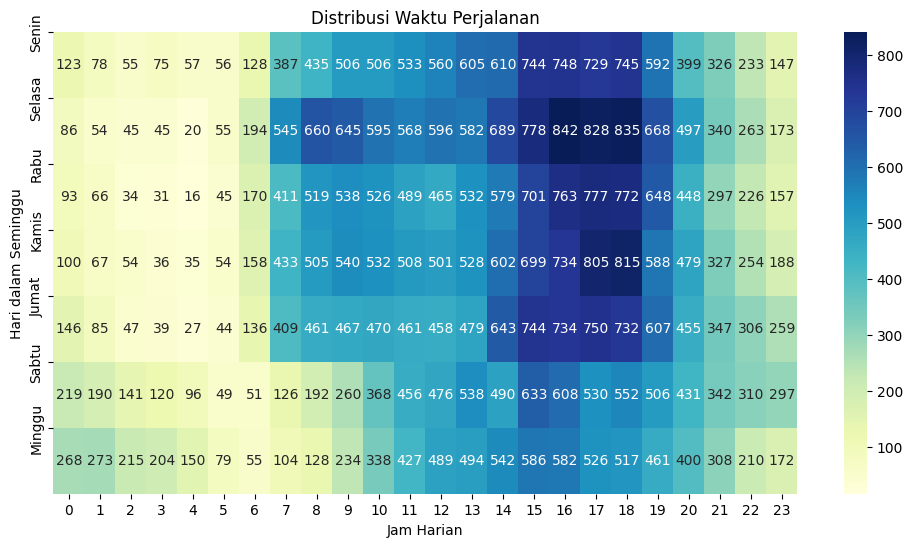

In [32]:

data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

data['pickup_hour'] = data['lpep_pickup_datetime'].dt.hour

data['pickup_day_of_week'] = data['lpep_pickup_datetime'].dt.dayofweek

days_of_week = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

pickup_time_distribution = data.groupby(['pickup_day_of_week', 'pickup_hour']).size().unstack()

pickup_time_distribution = pickup_time_distribution.reindex(columns=range(24))

plt.figure(figsize=(12, 6))
sns.heatmap(data=pickup_time_distribution, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Distribusi Waktu Perjalanan')
plt.xlabel('Jam Harian')
plt.ylabel('Hari dalam Seminggu')
plt.yticks(range(7), days_of_week)
plt.show()


Tren dan Analisis Distribusi Waktu Perjalanan :

* Jam Puncak di Pagi Hari: Terlihat bahwa pada hari-hari kerja, ada peningkatan signifikan dalam jumlah perjalanan taksi pada jam 7 pagi. Fenomena ini kemungkinan besar disebabkan oleh orang-orang yang berangkat kerja pada jam tersebut. Mungkin mereka ingin menghindari kemacetan lalu lintas pagi hari dengan memilih taksi sebagai sarana transportasi.

* Jam Sibuk Pada Sore Hari: Selain jam sibuk pagi, terdapat juga peningkatan dalam jumlah perjalanan pada jam-jam sore hari pada hari-hari kerja. Hal ini bisa terkait dengan aktivitas pulang kerja, pertemuan, atau kegiatan lainnya yang berlangsung di sore hari.


* Potensi Pengembangan Layanan: Analisis distribusi waktu perjalanan ini dapat membantu penyedia layanan taksi dalam merencanakan strategi dan promosi yang lebih efektif. Misalnya, mereka dapat menawarkan diskon khusus atau promosi pada jam-jam sibuk untuk menarik lebih banyak pelanggan atau menyesuaikan tarif untuk mengoptimalkan pendapatan.

* Keberlanjutan Operasional: Pada jam-jam tertentu yang kurang ramai, penyedia layanan taksi mungkin perlu mempertimbangkan penyesuaian dalam pelayanan mereka. Ini bisa melibatkan mengoptimalkan penggunaan armada atau memberikan insentif kepada pengemudi agar tetap aktif selama jam-jam dengan permintaan rendah.

Analisis ini menggali lebih dalam tentang tren distribusi waktu perjalanan taksi, yang dapat memberikan wawasan berharga bagi penyedia layanan dan pemerintah dalam mengatur operasional dan pelayanan taksi.

# Analisis Tarif dan Jarak

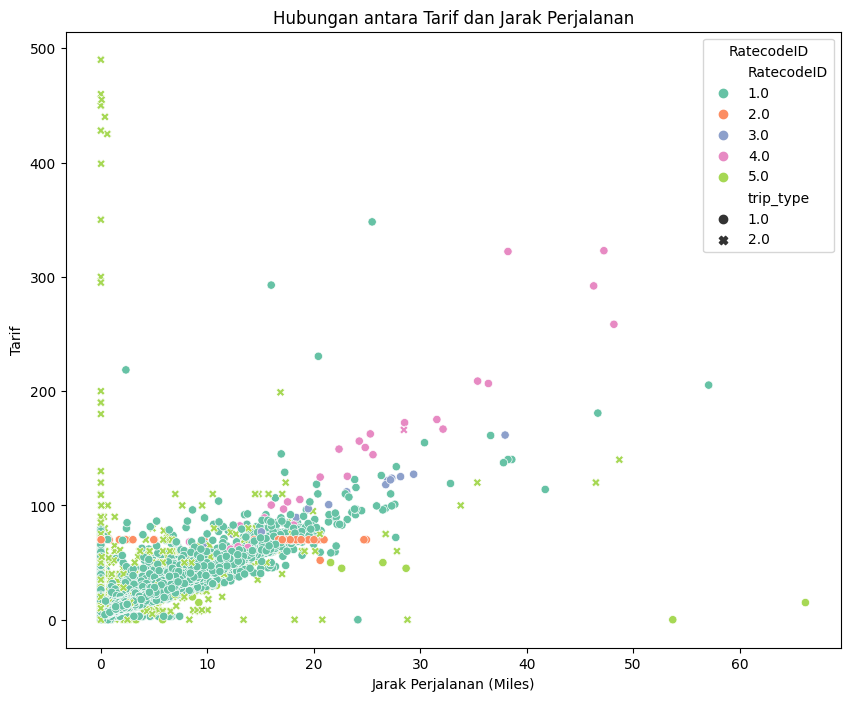

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='RatecodeID', style='trip_type', data=data, palette='Set2')
plt.title("Hubungan antara Tarif dan Jarak Perjalanan")
plt.xlabel("Jarak Perjalanan (Miles)")
plt.ylabel("Tarif")
plt.legend(title="RatecodeID")
plt.show()

- Analisis ini membantu kita memahami hubungan antara tarif, jarak perjalanan, dan jenis perjalanan.
- Scatter plot dengan warna dan gaya berbeda untuk RatecodeID dan trip_type membantu mengidentifikasi pola dalam hubungan tersebut.


In [34]:

vendor_mapping = {
    1: 'Creative Mobile Technologies, LLC.',
    2: 'VeriFone Inc.'
}

data['VendorID'] = data['VendorID'].replace(vendor_mapping)

* kenapa saya ubah angka di dalam kolom VendorID karena untuk visualisasi lebih jelas

In [35]:
data.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,pickup_day,pickup_hour,pickup_day_of_week
count,63874,63874,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000,63874.000000
mean,2023-01-16 20:29:58.098851072,2023-01-16 20:47:56.523139584,1.101779,97.731753,138.309703,1.321101,2.552484,16.090957,0.882855,0.628249,2.041793,0.144087,0.951836,19.643854,1.021934,0.726982,2.842095,13.906472,2.842095
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-01-09 12:15:57.500000,2023-01-09 12:34:14.500000,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,11.580000,1.000000,0.000000,1.000000,10.000000,1.000000
50%,2023-01-17 08:44:46.500000,2023-01-17 08:59:24.500000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,16.100000,1.000000,0.000000,3.000000,15.000000,3.000000
75%,2023-01-24 16:18:43.249999872,2023-01-24 16:36:50.249999872,1.000000,118.500000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,23.430000,1.000000,2.750000,4.000000,18.000000,4.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,7.000000,66.180000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,490.000000,2.000000,2.750000,6.000000,23.000000,6.000000
std,NaN,NaN,0.620310,60.174354,76.883146,0.974108,2.672388,13.242704,1.289307,0.363792,2.998320,1.012446,0.181883,14.477713,0.146469,1.212668,1.960914,5.199906,1.960914


In [36]:
# Menyimpan DataFrame ke file CSV
data.to_csv('data_bersih_tlc_taxi_nyc8.csv', index=False)

# Kesimpulan

Melalui analisis yang mendalam terhadap karakteristik perjalanan taksi di New York City, kita dapat mengidentifikasi beberapa temuan penting yang memengaruhi pendapatan dan preferensi pembayaran, serta memberikan wawasan tentang bagaimana efektivitas layanan dapat ditingkatkan untuk memberikan pengalaman lebih baik kepada penumpang.


Dalam rangka menganalisis data perjalanan taksi di New York City, temuan-temuan penting telah diidentifikasi. Distribusi variabel seperti jarak perjalanan, biaya, dan jumlah tips memberikan wawasan yang berharga untuk menginformasikan perencanaan tarif dan promosi yang lebih baik. Korelasi antar variabel mengungkapkan hubungan yang kompleks antara faktor-faktor kunci, sementara identifikasi zona-zona dengan aktivitas perjalanan tertinggi dan rata-rata pendapatan menggarisbawahi perlunya strategi yang disesuaikan. Preferensi pembayaran menunjukkan bahwa penggunaan kartu kredit dapat berdampak pada biaya perjalanan. Analisis terhadap tren harian dan waktu perjalanan memungkinkan penyedia layanan untuk merancang strategi operasional yang lebih efektif. Keseluruhan, analisis ini menegaskan pentingnya pengambilan keputusan yang didasarkan pada data dan wawasan, untuk meningkatkan kualitas layanan dan operasional industri taksi di New York City.

# Rekomendasi dan Solusi



1. **Penyesuaian Tarif**: Sesuaikan tarif berdasarkan jarak yang ditempuh oleh penumpang. Tarif yang lebih tinggi untuk perjalanan jarak jauh dan tarif yang lebih rendah untuk perjalanan pendek. Ini akan membuat biaya perjalanan lebih adil dan sesuai dengan jarak yang ditempuh.

2. **Diskon Pembayaran Non-Tunai**: Berikan diskon khusus bagi mereka yang membayar dengan kartu kredit atau metode non-tunai lainnya. Ini akan mendorong lebih banyak orang untuk menggunakan metode pembayaran non-tunai, yang dapat meningkatkan pendapatan.

3. **Tarif Fleksibel Berdasarkan Waktu**: Pertimbangkan tarif yang berbeda pada jam-jam sibuk dan tenang. Tarif lebih rendah saat jam-jam sepi dapat menarik lebih banyak penumpang dan menjaga armada tetap aktif.

4. **Promosi untuk Zona Aktivitas Rendah**: Berikan penawaran istimewa di zona-zona dengan aktivitas perjalanan rendah. Ini akan membantu menarik lebih banyak pelanggan ke zona-zona tersebut.

5. **Aplikasi Mudah Digunakan**: Kembangkan aplikasi yang memudahkan penumpang dalam memesan taksi dan melakukan pembayaran. Kemudahan ini dapat menarik lebih banyak pengguna dan memperbaiki interaksi dengan pelanggan.

6. **Armada Berdasarkan Permintaan**: Kelola jumlah kendaraan aktif berdasarkan permintaan. Kurangi armada pada jam-jam sepi untuk menghindari pemborosan sumber daya.

7. **Insentif untuk Perjalanan Jarak Jauh**: Tawarkan insentif khusus seperti diskon atau bonus untuk perjalanan jarak jauh. Ini akan mendorong penumpang untuk memilih taksi untuk perjalanan panjang.

8. **Pelatihan Pengemudi**: Berikan pelatihan kepada pengemudi tentang bagaimana memberikan pelayanan yang baik dan bagaimana meningkatkan kesempatan mendapatkan tips lebih besar.

9. **Kolaborasi dengan Pemerintah**: Bekerjasama dengan pemerintah untuk memahami kebijakan transportasi dan kemacetan dapat membantu dalam merencanakan rute dan operasional yang lebih baik.

10. **Feedback Pelanggan**: Aktif mendengarkan umpan balik dari pelanggan dan mengambil tindakan yang sesuai untuk meningkatkan pengalaman perjalanan.

Dengan menerapkan rekomendasi ini, penyedia layanan taksi dapat meningkatkan efisiensi, pendapatan, dan memberikan pengalaman yang lebih baik kepada penumpang.